In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics as st
from scipy.stats import norm
from scipy.stats import gamma
import statsmodels.api as sm

# Menyiapkan data

In [2]:
path = 'C:/Users/felic/OneDrive - mikroskil.ac.id/Kuliah/Semester 7 (MSIB)/Tugas/nyc-rolling-sales.csv'
df_nyc = pd.read_csv(path)

In [3]:
# Membuat dataset copy dari df_nyc
dataset = df_nyc
dataset.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Mengubah data BOROUGH agar menjadi lebih mudah dibaca berdasarkan keterangan dari dataset.

In [5]:
# Borough: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
dataset['BOROUGH'] = dataset['BOROUGH'].astype(str)
dataset['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'}, inplace=True)

Setelah melakukan pengecekan, diketahui terdapat beberapa kolom masih memiliki beberapa data yang kotor seperti kosong, tidak sesuai tipe data seharusnya, dll.

In [6]:
#df_nyc['EASE-MENT'].unique()                   # Seluruh nilai kosong
#df_nyc['APARTMENT NUMBER'].unique()            # Terdapat nilai kosong
#df_nyc['SALE PRICE'].unique()                  # Terdapat nilai '-'
#df_nyc['YEAR BUILT'].unique()                  # Terdapat nilai 0
#df_nyc['LAND SQUARE FEET'].unique()            # Terdapat nilai 0
#df_nyc['GROSS SQUARE FEET'].unique()           # Terdapat nilai 0
#df_nyc['BUILDING CLASS AT PRESENT'].unique()   # Terdapat nilai kosong
#df_nyc['TAX CLASS AT PRESENT'].unique()        # Terdapat nilai kosong

Membuang kolom-kolom yang tidak terlalu digunakan

In [7]:
# Menghapus kolom 'EASE-MENT', 'APARTMENT NUMBER', dan 'Unnamed: 0' dari dataset
dataset = dataset.drop(['EASE-MENT','APARTMENT NUMBER','Unnamed: 0'],axis=1)

In [8]:
# Mengubah nilai non-integer pada kolom 'SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT' menjadi NaN
num_kolom = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']

for col in num_kolom:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

In [9]:
# Mengubah semua data kotor dari dataset menjadi NaN
dataset.replace([' -  ',' '], np.nan, inplace=True)

In [10]:
dataset.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [11]:
# Membuang semua baris yang NaN di kolom 'TAX CLASS AT PRESENT'
dataset.dropna(subset = ['TAX CLASS AT PRESENT'], inplace=True)

In [12]:
# Mengecek apakah terdapat data duplikat pada dataset
dataset.duplicated().sum()

765

In [13]:
# Membuang semua data duplikat pada dataset
dataset.drop_duplicates(inplace = True)

In [14]:
# Mengecek apakah terdapat data duplikat pada dataset
dataset.duplicated().sum()

0

In [15]:
dataset.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  25668
GROSS SQUARE FEET                 26999
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14111
SALE DATE                             0
dtype: int64

In [16]:
# Membuang semua nilai NaN dari dataset
dataset = dataset.dropna()
dataset.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [17]:
dataset.shape

(47544, 19)

Berdasarkan kriteria dataset: "Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement"

Dapat diketahui bahwa rentang harga penjualan dari yang tertinggi dan terendah sangat jauh.

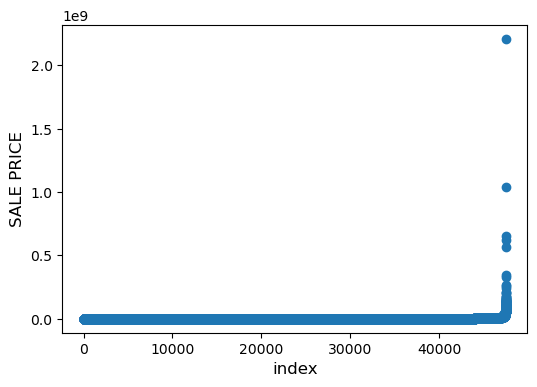

In [18]:
# Mengecek rentang harga penjualan
plt.figure(figsize=(6,4))
plt.scatter(range(dataset.shape[0]), np.sort(dataset['SALE PRICE'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('SALE PRICE', fontsize=12)
plt.show()

Berdasarkan plot diatas, bisa dilihat betapa besarnya rentang harga jual yang ada. 

Berdasarkan kriteria dataset: "Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement"

Untuk memudahkan dalam pengerjaan, berdasarkan kriteria tentang adanya SALES yang merupakan penyerahan properti dari orang tua kepada anaknya, dsb. Maka akan nilai SALE PRICE yang bernilai kecil akan diabaikan sehingga akan mengambil harga mulai dari $10.000 keatas.

In [19]:
dataset = dataset[dataset['SALE PRICE'] > 10000].copy()
dataset.shape

(36505, 19)

In [20]:
# Membuang baris dengan nilai 0 dari kolom 'LAND SQUARE FEET'
dataset = dataset[dataset['LAND SQUARE FEET'] != 0]

# Membuang baris dengan nilai 0 dari kolom 'GROSS SQUARE FEET'
dataset = dataset[dataset['GROSS SQUARE FEET'] != 0]

# Membuang baris dengan nilai 0 dari kolom 'TOTAL UNITS'
dataset = dataset[dataset['TOTAL UNITS'] > 0]

# Membuang baris dengan nilai 0 dari kolom 'YEAR BUILT'
dataset = dataset[dataset['YEAR BUILT'] != 0]

In [21]:
dataset.shape

(28244, 19)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28244 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         28244 non-null  object 
 1   NEIGHBORHOOD                    28244 non-null  object 
 2   BUILDING CLASS CATEGORY         28244 non-null  object 
 3   TAX CLASS AT PRESENT            28244 non-null  object 
 4   BLOCK                           28244 non-null  int64  
 5   LOT                             28244 non-null  int64  
 6   BUILDING CLASS AT PRESENT       28244 non-null  object 
 7   ADDRESS                         28244 non-null  object 
 8   ZIP CODE                        28244 non-null  int64  
 9   RESIDENTIAL UNITS               28244 non-null  int64  
 10  COMMERCIAL UNITS                28244 non-null  int64  
 11  TOTAL UNITS                     28244 non-null  int64  
 12  LAND SQUARE FEET                28244

# Statistik

## Mean

Mean Manhattan, Bronx, Brooklyn, Queens, Staten Island:
 20190392.0 1058055.0 1564515.0 932490.0 542075.0


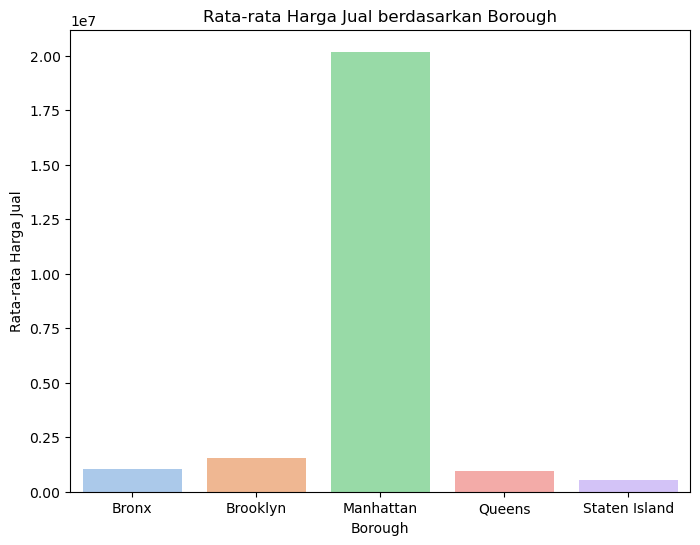

In [23]:
# Menghitung mean dari harga jual tiap borough
mean1 = dataset[dataset['BOROUGH'] == "Manhattan"]['SALE PRICE'].mean().round()
mean2 = dataset[dataset['BOROUGH'] == "Bronx"]['SALE PRICE'].mean().round()
mean3 = dataset[dataset['BOROUGH'] == "Brooklyn"]['SALE PRICE'].mean().round()
mean4 = dataset[dataset['BOROUGH'] == "Queens"]['SALE PRICE'].mean().round()
mean5 = dataset[dataset['BOROUGH'] == "Staten Island"]['SALE PRICE'].mean().round()

print("Mean Manhattan, Bronx, Brooklyn, Queens, Staten Island:\n", mean1,mean2,mean3,mean4,mean5)

# Memvisualisasikan mean harga jual tiap borough
df_mean = dataset.groupby('BOROUGH')['SALE PRICE'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='BOROUGH', y='SALE PRICE', data=df_mean, palette='pastel')
plt.title('Rata-rata Harga Jual berdasarkan Borough')
plt.xlabel('Borough')
plt.ylabel('Rata-rata Harga Jual')
plt.show()

Kesimpulan: Manhattan memiliki rata-rata harga jual tertinggi diantara borough lainnya.

## Median

Median Manhattan, Bronx, Brooklyn, Queens, Staten Island:
 6800000.0 490000.0 881797.5 649000.0 490000.0


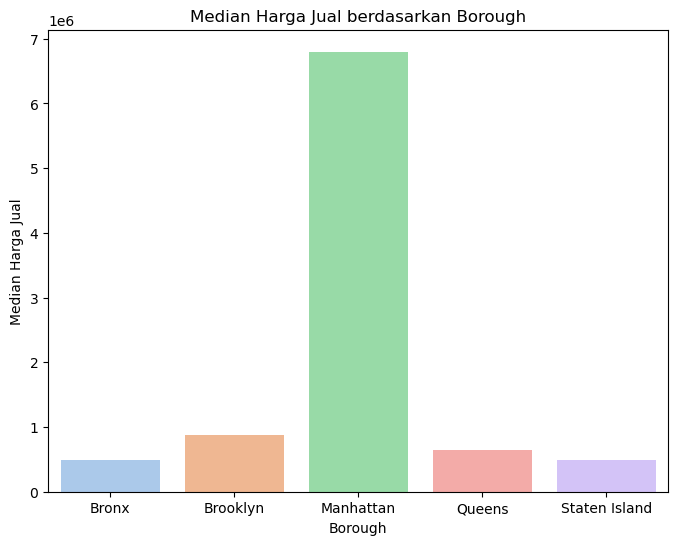

In [24]:
# Menghitung mean dari harga jual tiap borough
median1 = dataset[dataset['BOROUGH'] == "Manhattan"]['SALE PRICE'].median()
median2 = dataset[dataset['BOROUGH'] == "Bronx"]['SALE PRICE'].median()
median3 = dataset[dataset['BOROUGH'] == "Brooklyn"]['SALE PRICE'].median()
median4 = dataset[dataset['BOROUGH'] == "Queens"]['SALE PRICE'].median()
median5 = dataset[dataset['BOROUGH'] == "Staten Island"]['SALE PRICE'].median()

print("Median Manhattan, Bronx, Brooklyn, Queens, Staten Island:\n", median1,median2,median3,median4,median5)

# Memvisualisasikan median harga jual tiap borough
df_median = dataset.groupby('BOROUGH')['SALE PRICE'].median().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='BOROUGH', y='SALE PRICE', data=df_median, palette='pastel')
plt.title('Median Harga Jual berdasarkan Borough')
plt.xlabel('Borough')
plt.ylabel('Median Harga Jual')
plt.show()

Kesimpulan: Manhattan memiliki nilai tengah harga jual tertinggi diantara borough lainnya.

## Modus

In [25]:
# Menghitung modus dari kolom "BUILDING CLASS AT TIME OF SALE"
modus = dataset['BUILDING CLASS AT TIME OF SALE'].mode()
print("Modus :", modus[0])

Modus : A1


Kesimpulan: A1 adalah kelas bangunan yang terbanyak terjual.

## Range

In [26]:
# Menghitung range dari kolom "LAND SQUARE FEET" untuk setiap borough
range_borough = dataset.groupby('BOROUGH')['LAND SQUARE FEET'].agg(lambda x: x.max() - x.min())
print("Range Luas Tanah per Borough:\n\t", range_borough)

Range Luas Tanah per Borough:
	 BOROUGH
Bronx             678703.0
Brooklyn          969600.0
Manhattan         188641.0
Queens           4228100.0
Staten Island    1864943.0
Name: LAND SQUARE FEET, dtype: float64


Kesimpulan: Queens adalah borough dengan rentang luas tanah tertinggi diantara borough lainnya.

## Standard Deviation

In [27]:
# Menghitung standar deviasi dari kolom 'TOTAL UNIT' untuk setiap borough
std = dataset.groupby('BOROUGH')['TOTAL UNITS'].std()

print("Standar Deviasi Total Unit per Borough:")
print(std)

Standar Deviasi Total Unit per Borough:
BOROUGH
Bronx            26.252048
Brooklyn          7.432881
Manhattan        70.333225
Queens           29.817678
Staten Island     3.866204
Name: TOTAL UNITS, dtype: float64


## Variance

In [28]:
# Menghitung varians dari kolom 'TOTAL UNIT' untuk setiap borough
var = dataset.groupby('BOROUGH')['TOTAL UNITS'].var()

print("Varians Total Unit per Borough:")
print(var)

Varians Total Unit per Borough:
BOROUGH
Bronx             689.170034
Brooklyn           55.247723
Manhattan        4946.762470
Queens            889.093915
Staten Island      14.947531
Name: TOTAL UNITS, dtype: float64


## Probability Distribution

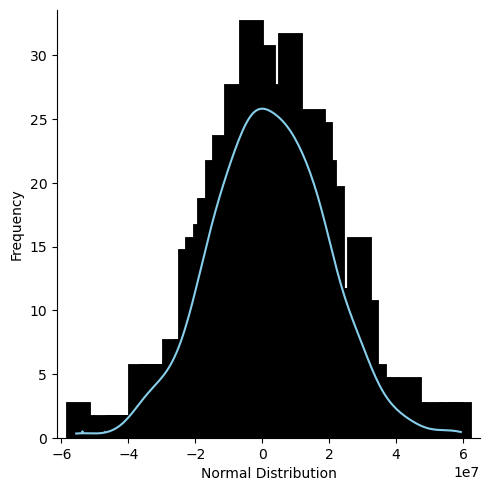

In [29]:
# Mengambil kolom 'SALE PRICE' dari dataset
df_price = dataset['SALE PRICE']

# Menghitung Mean dan Standar Deviasi dari 'SALE PRICE'
mean_price = df_price.mean()
std_price = df_price.std()

# Membuat distribusi normal dengan mean dan std yang telah didapat
normal = norm.rvs(loc = mean_price, scale = std_price, size = 1000)

# Memvisualisasikan distribusi normal
ax = sns.displot(normal, bins=100, kde=True, color='skyblue', linewidth=15, alpha=1)

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

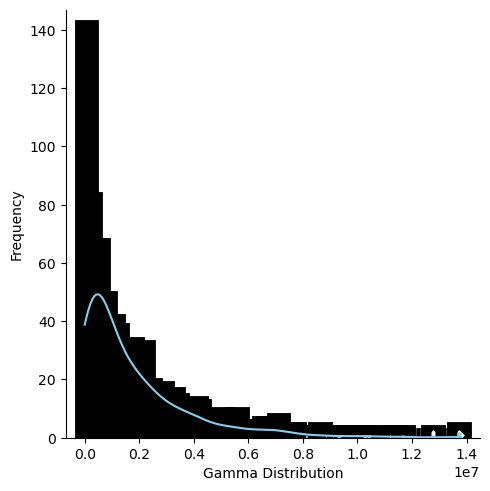

In [30]:
# Mengidentifikasi parameter distribusi gamma
alpha, loc, beta = gamma.fit(df_price, floc = 0)

# Memvisualisasikan distribusi gamma
gammas = gamma.rvs(alpha, loc = loc, scale = beta, size = 1000)

ax = sns.displot(gammas, bins=100, kde=True, color='skyblue', linewidth=15, alpha=1)

ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

Kesimpulan: Bisa dilihat bahwa hasil distribusi condong ke kiri. Hal ini artinya penjualan properti dengan harga yang rendah lebih banyak dilakukan dibandingkan properti dengan harga tinggi. 

## Confidence Intervals

In [31]:
# Menghitung proporsi populasi dari kolom "TOTAL UNITS"
df_total_all = df_nyc['TOTAL UNITS']
df_total = df_total_all[df_total_all > 0]

p_total = len(df_total) / len(df_total_all)

# Jumlah data
n = len(df_total_all)

# Standad error
se_total = np.sqrt(p_total * (1- p_total) / n)

# Menghitung confidence interval untuk proporsi populasi
z_score = 1.96

low = p_total - z_score * se_total # lower limit
upp = p_total + z_score * se_total # Upper limit

low, upp

(0.7634102447071961, 0.7691156577387518)

## Hypothesis Testing

Uji Hipotesis Harga Jual Rata-rata antara Borough Manhattan dan Brooklyn

Hipotesis Nol (H0): Rata-rata harga jual properti di Borough Manhattan sama dengan rata-rata harga jual properti di Brooklyn.

Hipotesis Alternatif (H1): Rata-rata harga jual properti di Borough Manhattan tidak sama dengan rata-rata harga jual properti di Brooklyn.

In [32]:
from scipy import stats

# Mengambil data harga untuk Borough Manhattan dan Brooklyn
manhattan_price = dataset[dataset['BOROUGH'] == "Manhattan"]['SALE PRICE']
brooklyn_price = dataset[dataset['BOROUGH'] == "Brooklyn"]['SALE PRICE']

# Melakukan uji t-test (two-sample independent t-test)
t_stat, p_value = stats.ttest_ind(manhattan_price, brooklyn_price, equal_var=False)

# Menetapkan tingkat signifikansi (alpha)
alpha = 0.05

# Menentukan hasil uji hipotesis
print("T-Stat:", t_stat)
print("P-Value:", p_value)

if p_value < alpha:
    print("Reject H0: Rata-rata harga jual di Manhattan tidak sama dengan Brooklyn")
else:
    print("Fail to reject H0: Rata-rata harga jual di Manhattan sama dengan Brooklyn")

T-Stat: 6.143823298941456
P-Value: 1.1991611576090624e-09
Reject H0: Rata-rata harga jual di Manhattan tidak sama dengan Brooklyn


# Analisis

Kesimpulan: 
- Kebanyakan transaksi penjualan properti adalah transaksi properti dengan harga menengah kebawah.
- Kebanyakan transaksi penjualan properti terjadi di borough Manhattan.